# Visualisation

In [2]:
# import libraries
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import seaborn as sns

# read in cleaned data file
df = pd.read_csv('netflix_titles_nov_2019_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11
1,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11
2,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11
3,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11
4,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5837 non-null   int64 
 1   show_id       5837 non-null   int64 
 2   title         5837 non-null   object
 3   director      5837 non-null   object
 4   cast          5837 non-null   object
 5   country       5837 non-null   object
 6   date_added    5195 non-null   object
 7   release_year  5837 non-null   int64 
 8   rating        5837 non-null   object
 9   duration      5837 non-null   object
 10  listed_in     5837 non-null   object
 11  description   5837 non-null   object
 12  type          5837 non-null   object
 13  year_month    5195 non-null   object
dtypes: int64(3), object(11)
memory usage: 638.6+ KB


In [68]:
# look at overlap between genres
df['listed_in_combined'] = df['listed_in'].str.replace('TV Shows', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('Movies', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('Movies', '')
df['listed_in_combined'] = df['listed_in_combined'].str.replace('TV', '')

# strip whitespace
df['listed_in_combined'] = df['listed_in_combined'].str.strip()

df['listed_in_combined'].unique()

array(['International', 'Korean', 'Romantic', 'Documentaries', 'Comedies',
       'Dramas', 'Independent', "Kids'", 'Thrillers', 'Crime',
       'Spanish-Language', 'Reality', 'Action & Adventure', 'Docuseries',
       'Children & Family', 'Anime Series',
       'Stand-Up Comedy & Talk Shows', 'Stand-Up Comedy', '', 'Mysteries',
       'Classic', 'Sci-Fi & Fantasy', 'Anime Features', 'Sports', 'Cult',
       'Horror', 'Teen', 'British', 'Music & Musicals', 'LGBTQ',
       'Science & Nature', 'Faith & Spirituality', 'Classic & Cult'],
      dtype=object)

## Counts of title

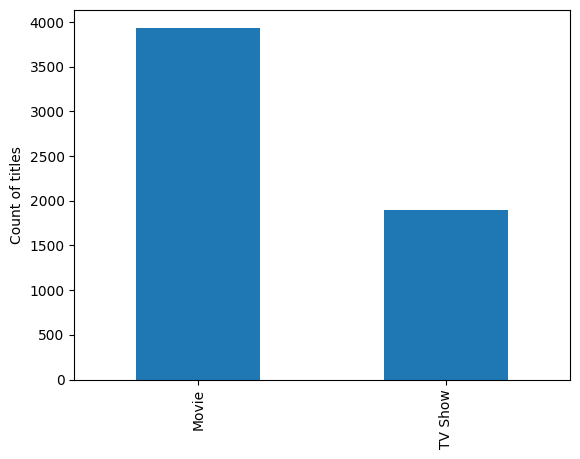

In [7]:
# count of titles by type
titles_by_type = df.groupby('type')['title'].count()

plt.figure()
titles_by_type.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

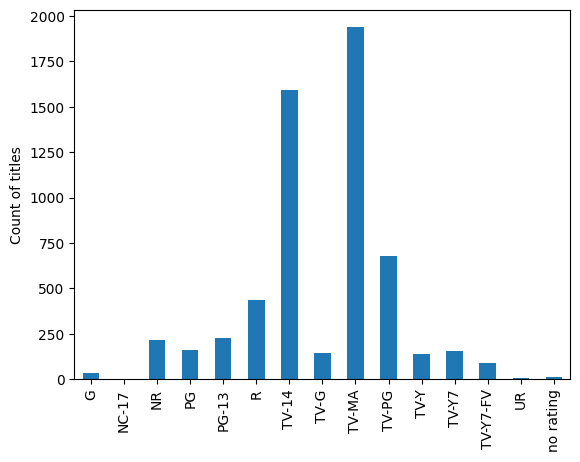

In [8]:
# count of titles by rating
titles_by_rating = df.groupby('rating')['title'].count()

plt.figure()
titles_by_rating.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

In [9]:
# separate out country into one row for each separate country
df['country'] = df['country'].str.split(', ')
df = df.explode('country').reset_index(drop=True)
df.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11
1,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11
2,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11
3,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11
4,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",Senegal,2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11


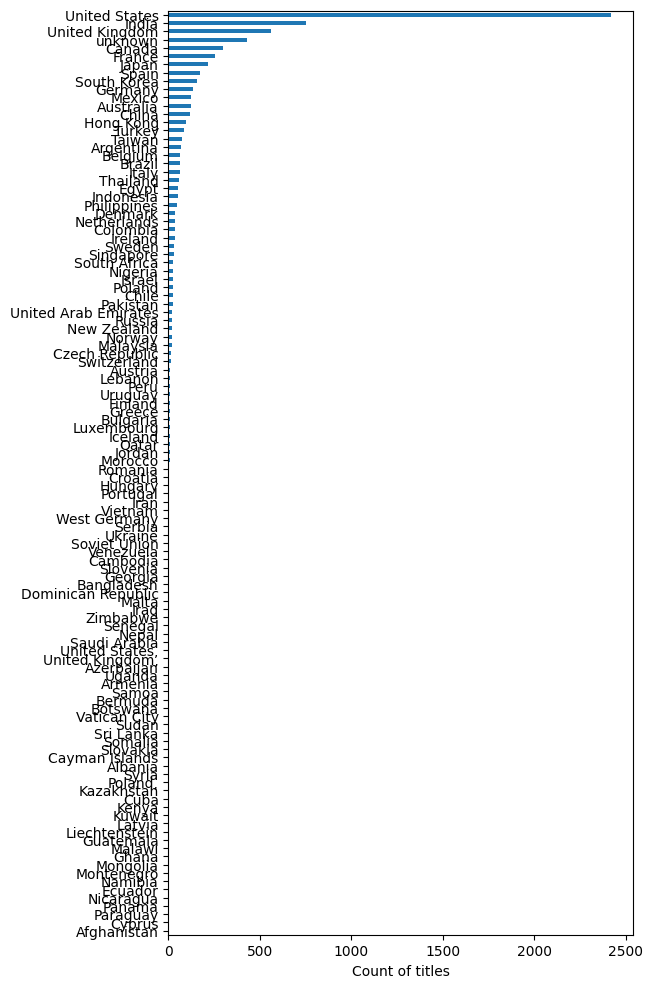

In [11]:
# count of titles by  country
titles_by_country = df.groupby('country')['title'].count()

# sort by count
titles_by_country = titles_by_country.sort_values()

plt.figure(figsize = (6,12))
titles_by_country.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

In [77]:
# create world map
import plotly.express as px

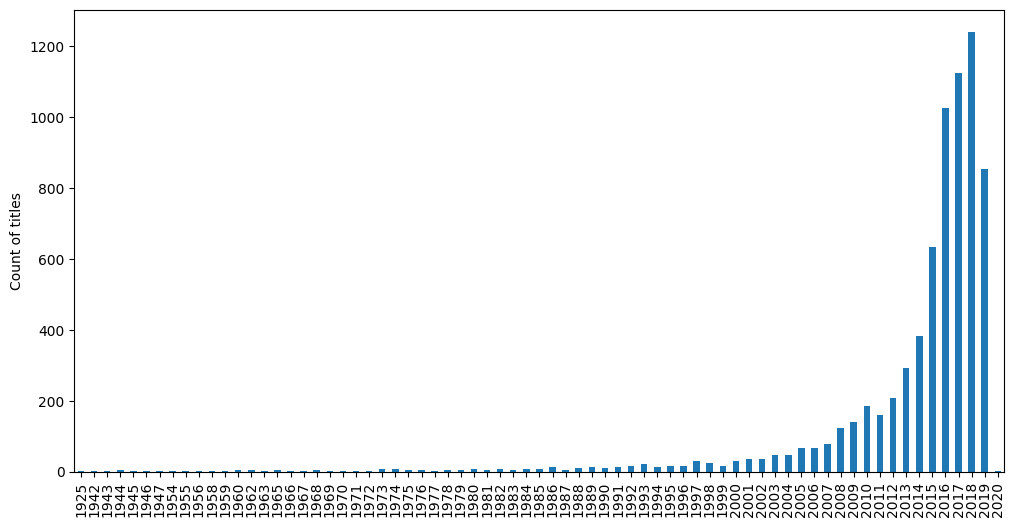

In [12]:
# count of titles by release year
titles_by_release_yr = df.groupby('release_year')['title'].count()

plt.figure(figsize = (12,6))
titles_by_release_yr.plot.bar()
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

In [13]:
# separate out listed_in into one row for each separate genre
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in').reset_index(drop=True)
df.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11
1,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11
2,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11
3,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11
4,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11


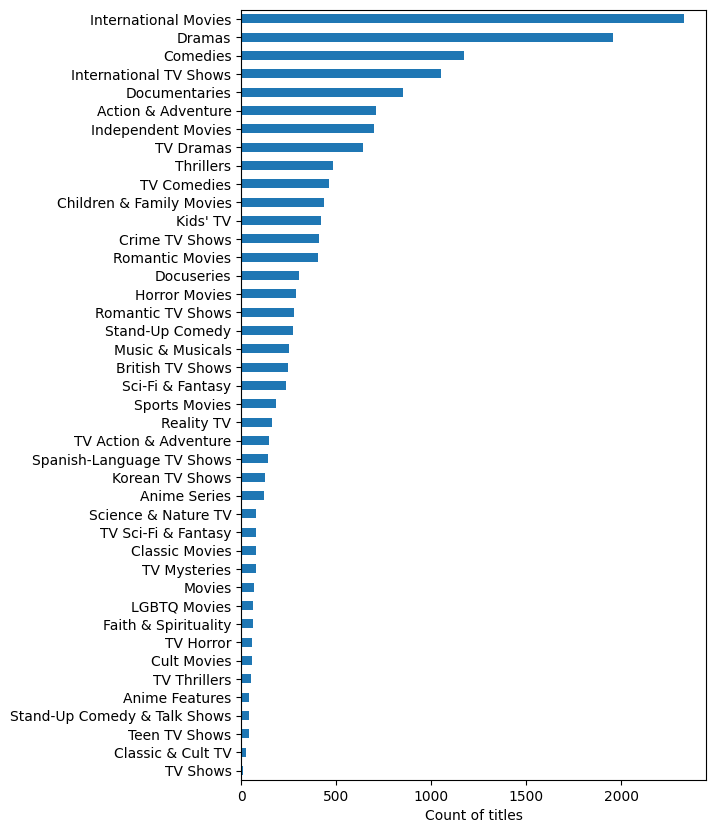

In [14]:
# count of titles by first genre
titles_by_genre = df.groupby('listed_in')['title'].count()

# sort by count
titles_by_genre = titles_by_genre.sort_values()

plt.figure(figsize = (6,10))
titles_by_genre.plot.barh()
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

## Movies only

In [69]:
movie = df[df['type'] == 'Movie']

movie.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month,month,year,listed_in_combined
3,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,11.0,2019.0,Documentaries
4,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,unknown,2019-11-30,2019,TV-G,67 min,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11,11.0,2019.0,International
5,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,Comedies,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,11.0,2019.0,Comedies
6,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,Dramas,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,11.0,2019.0,Dramas
7,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,International Movies,A goofy copywriter unwittingly convinces the I...,Movie,2019-11,11.0,2019.0,International


In [16]:
# remove 'min' and create numerical version of duration
movie['duration_num'] = movie['duration'].str[:-4]

movie['duration_num'] = pd.to_numeric(movie['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_12824\4080566439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_num'] = movie['duration'].str[:-4]
C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_12824\4080566439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_num'] = pd.to_numeric(movie['duration_num'])


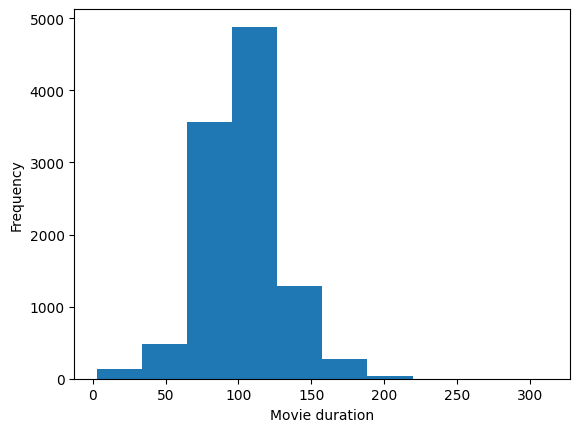

In [17]:
# count of movies by duration
plt.figure()

movie['duration_num'].plot(kind = 'hist')

plt.xlabel('Movie duration')

plt.show();

## TV shows only duration

In [70]:
tv = df[df['type'] == 'TV Show']

tv.head()

,Unnamed: 0,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_month,month,year,listed_in_combined
0,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,11.0,2019.0,International
1,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,11.0,2019.0,Korean
2,0,81193313,Chocolate,unknown,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,2019-11,11.0,2019.0,Romantic
17,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...",Canada,NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,NaN,Kids'
18,4,80213643,Chip and Potato,unknown,"Abigail Oliver, Andrea Libman, Briana Buckmast...",United Kingdom,NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,NaN,Kids'


In [19]:
# remove 'Season'/'Seasons' and create numerical version of duration
tv['duration_num'] = tv['duration'].str[:-7]

tv['duration_num'] = pd.to_numeric(tv['duration_num'])

C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_12824\3176011602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['duration_num'] = tv['duration'].str[:-7]
C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_12824\3176011602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['duration_num'] = pd.to_numeric(tv['duration_num'])


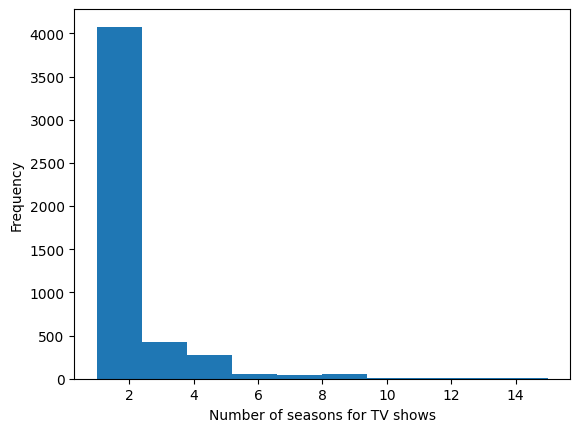

In [20]:
# count of tv shows by duration
plt.figure()

tv['duration_num'].plot(kind = 'hist')

plt.xlabel('Number of seasons for TV shows')

plt.show();

## Movie vs TV show comparison

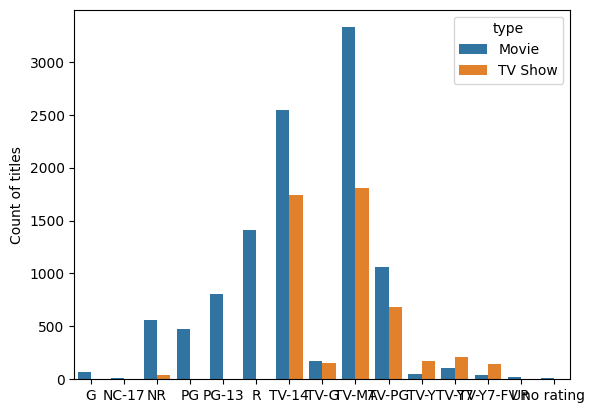

In [21]:
# count of titles by rating and type
titles_by_rating_type = df.groupby(['rating', 'type'])['title'].count().reset_index()

plt.figure()
sns.barplot(data = titles_by_rating_type, 
            x = 'rating', 
            y = 'title', 
            hue = 'type')
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

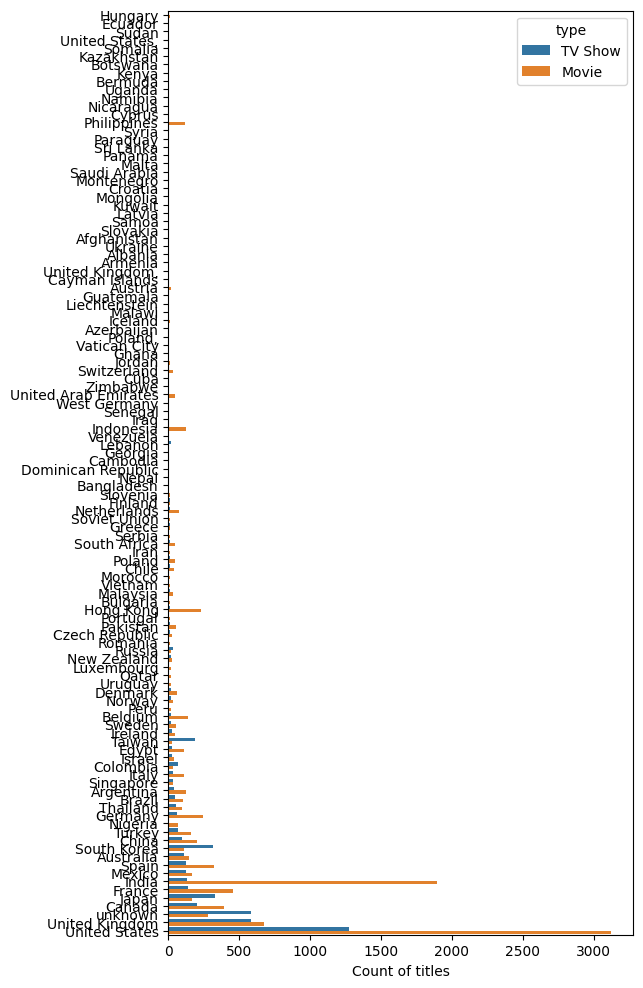

In [24]:
# count of titles by  country and type
titles_by_country_type = df.groupby(['country', 'type'])['title'].count().reset_index()

titles_by_country_type = titles_by_country_type.sort_values(by = 'title')

plt.figure(figsize = (6,12))
sns.barplot(data = titles_by_country_type, 
            x = 'title', 
            y = 'country', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

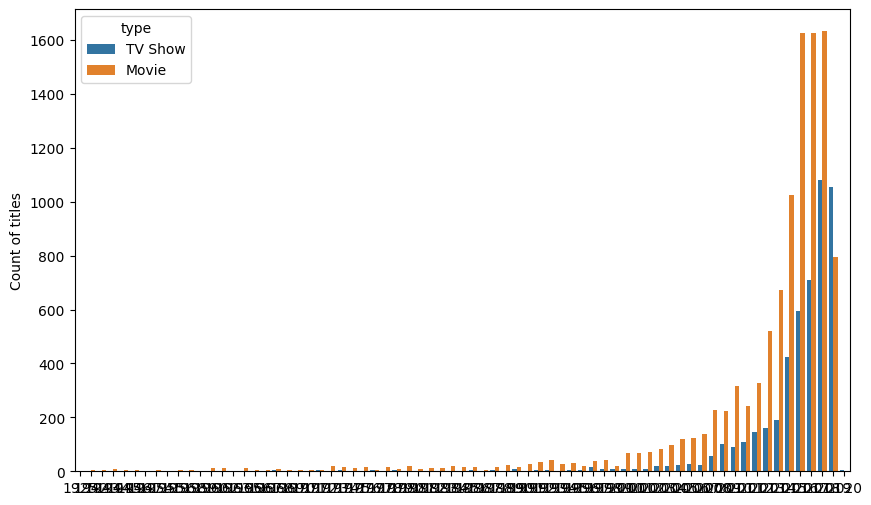

In [25]:
# count of titles by release year and type
titles_by_release_yr_type = df.groupby(['release_year', 'type'])['title'].count().reset_index()

titles_by_release_yr_type = titles_by_release_yr_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_release_yr_type, 
            x = 'release_year', 
            y = 'title', 
            hue = 'type')
plt.ylabel('Count of titles')
plt.xlabel(None)

plt.show();

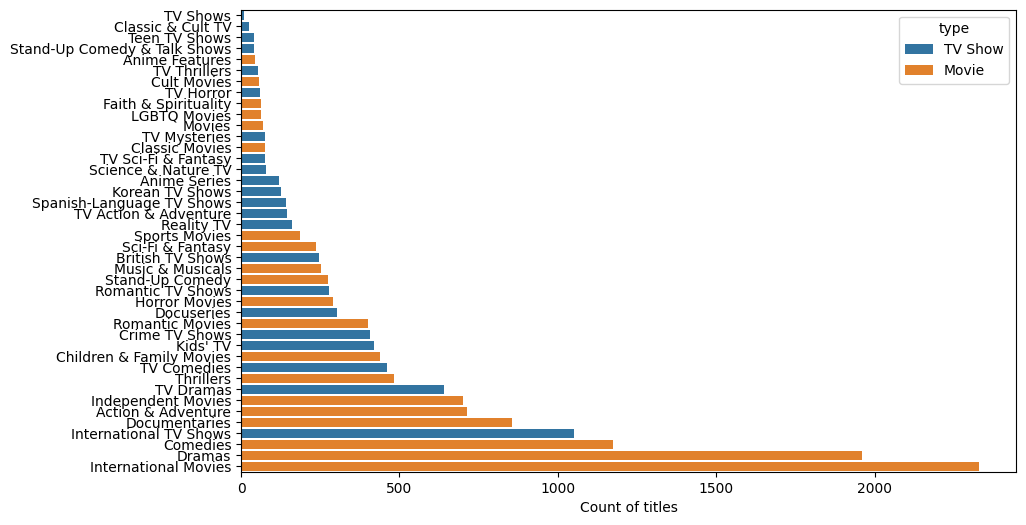

In [26]:
# count of titles by genre and type
titles_by_genre_type = df.groupby(['listed_in', 'type'])['title'].count().reset_index()

titles_by_genre_type = titles_by_genre_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_genre_type, 
            x = 'title', 
            y = 'listed_in', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

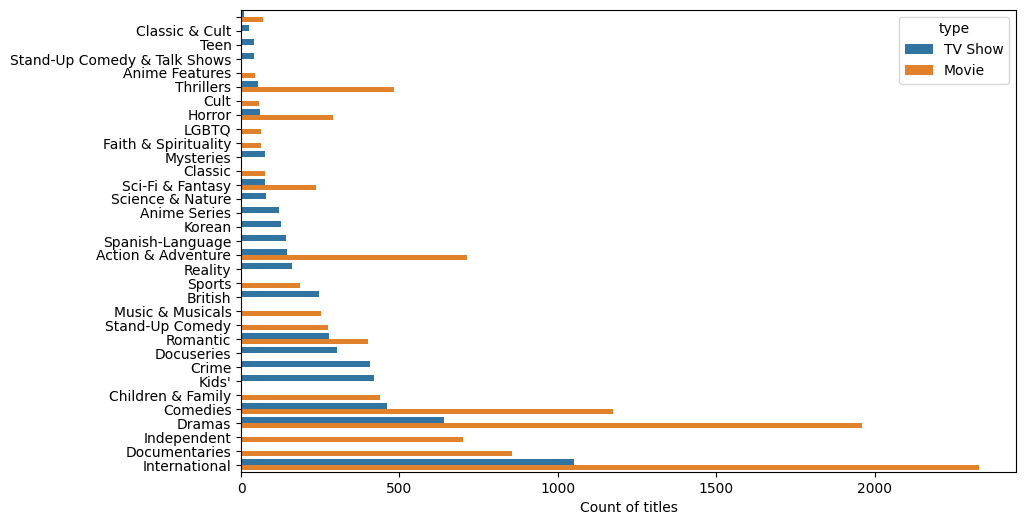

In [71]:
# count of titles by combined genre and type
titles_by_genre_type = df.groupby(['listed_in_combined', 'type'])['title'].count().reset_index()

titles_by_genre_type = titles_by_genre_type.sort_values(by = 'title')

plt.figure(figsize = (10,6))
sns.barplot(data = titles_by_genre_type, 
            x = 'title', 
            y = 'listed_in_combined', 
            hue = 'type', 
            orient = 'h')
plt.xlabel('Count of titles')
plt.ylabel(None)

plt.show();

## Description

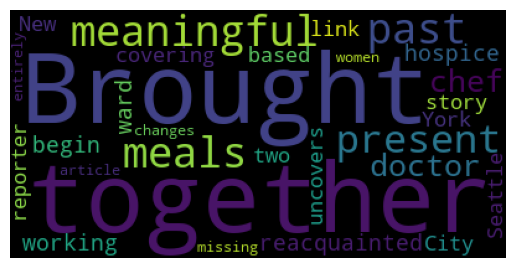

In [46]:
from wordcloud import WordCloud

text = df['description'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis('off')
plt.show();

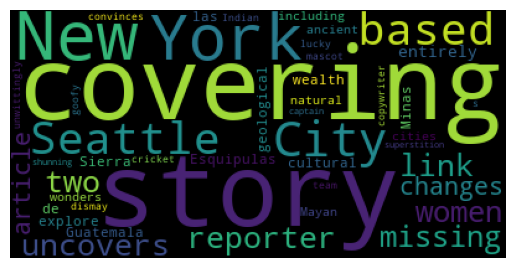

In [47]:
# wordcloud for movies
text_movie = movie['description'].values

wordcloud_movie = WordCloud().generate(str(text_movie))

plt.imshow(wordcloud_movie)
plt.axis('off')
plt.show();

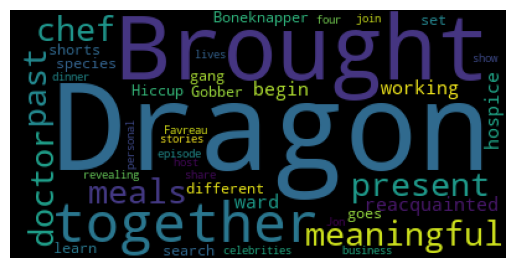

In [48]:
# wordcloud for tv shows
text_tv = tv['description'].values

wordcloud_tv = WordCloud().generate(str(text_tv))

plt.imshow(wordcloud_tv)
plt.axis('off')
plt.show();

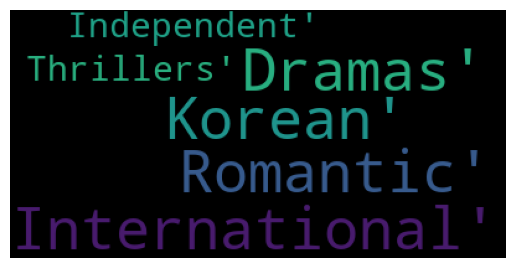

In [67]:
# wordcloud for genre
text_genre = df['listed_in_combined'].values

wordcloud_genre = WordCloud().generate(str(text_genre))

plt.imshow(wordcloud_genre)
plt.axis('off')
plt.show();

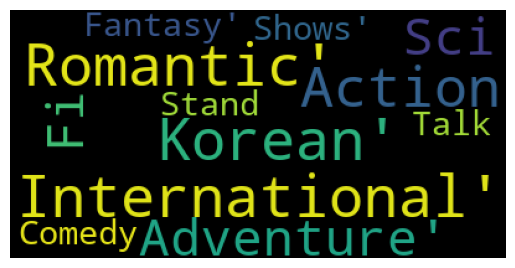

In [72]:
# wordcloud for tv genre
text_genre_tv = tv['listed_in_combined'].values

wordcloud_genre_tv = WordCloud().generate(str(text_genre_tv))

plt.imshow(wordcloud_genre_tv)
plt.axis('off')
plt.show();

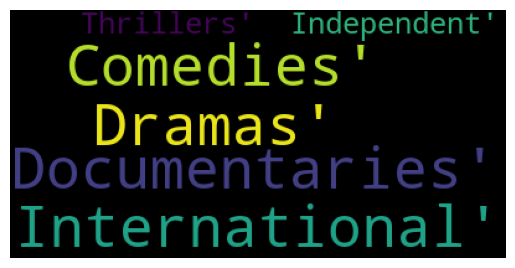

In [74]:
# wordcloud for movie genre
text_genre_movie = movie['listed_in_combined'].values

wordcloud_genre_movie = WordCloud().generate(str(text_genre_movie))

plt.imshow(wordcloud_genre_movie)
plt.axis('off')
plt.show();

## Dates added

In [62]:
# add separate column for month and year
df['month'] = pd.to_datetime(df['date_added']).dt.month
df['year'] = pd.to_datetime(df['date_added']).dt.year

df['month'] = df['month'].astype(int)

df.info()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\NM2.DHU65ATF\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\NM2.DHU65ATF\AppData\Local\Temp\ipykernel_12824\1096545490.py", line 5, in <module>
    df['month'] = df['month'].astype(int)
                  ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NM2.DHU65ATF\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NM2.DHU65ATF\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\NM2.DHU65ATF\AppData\Roaming\Python\Python312\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = g